In [53]:
import pandas as pd
from sklearn.datasets import load_boston

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [20]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
print(bos.describe)
bos.head()

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [23]:
bos['Price'] = boston.target

X = bos.copy()
X = bos.drop('Price', axis=1) #feature matrix
Y = bos['Price'] #target feature

In [27]:
# print(X.head())
# print('\n')
# print(Y.head())

In [29]:
varNames = list(X.columns.values)
maxCols = X.shape[1]

varNames

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [32]:
sfs = SFS(LinearRegression(),
         k_features=(1, maxCols), # python to examine every possible model from 1 to maxCols
         forward = True, # True starts with a Null model and starts adding variables, False starts with everything
         floating =False, # Stepwise or Forward
         scoring = 'r2', # r^2 value
         cv = 5) # cross-validation, python breaks the data into 5 data sets
sfs.fit(X.values, Y.values)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=(1, 13), n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

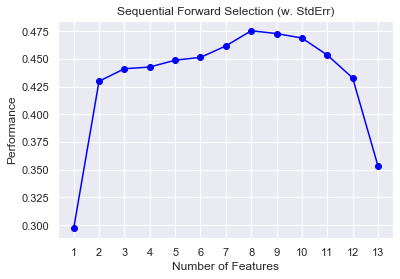

In [55]:
theFigure = plot_sfs(sfs.get_metric_dict(), kind=None)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.show()

In [42]:
dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T # The best metrics for a model with one variable, two variables, three variables, etc..
dfm_names = dfm.columns.values

dfm = dfm[['feature_names', 'avg_score']]
print(dfm)
dt = dfm.dtypes
print(dt)

                                 feature_names avg_score
1                                        (12,)   0.29711
2                                     (10, 12)  0.429882
3                                  (3, 10, 12)  0.441128
4                               (3, 5, 10, 12)    0.4427
5                            (0, 3, 5, 10, 12)  0.448866
6                        (0, 3, 5, 10, 11, 12)  0.451407
7                     (0, 3, 5, 7, 10, 11, 12)  0.461711
8                  (0, 2, 3, 5, 7, 10, 11, 12)  0.475429
9               (0, 1, 2, 3, 5, 7, 10, 11, 12)  0.472875
10           (0, 1, 2, 3, 4, 5, 7, 10, 11, 12)  0.468855
11        (0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12)  0.453487
12     (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)  0.432817
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)  0.353276
feature_names    object
avg_score        object
dtype: object


In [41]:
dfm.avg_score = dfm.avg_score.astype(float)
maxIndex = dfm.avg_score.argmax()
print('argmax')
print(dfm.iloc[maxIndex,])

argmax
feature_names    (0, 2, 3, 5, 7, 10, 11, 12)
avg_score                           0.475429
Name: 8, dtype: object


In [44]:
theVars = dfm.iloc[maxIndex, ]
theVars = theVars.feature_names
print(theVars)

('0', '2', '3', '5', '7', '10', '11', '12')


In [46]:
theVarNames = []
for i in theVars:
    index = int(i)
    try:
        theName = varNames[index]
        theVarNames.append(theName)
    except:
        pass

for i in theVarNames:
    print(i)

CRIM
INDUS
CHAS
RM
DIS
PTRATIO
B
LSTAT


In [47]:
W = X [theVarNames] # The variables we want for our model
W.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
RM,6.57500,6.42100,7.18500,6.99800,7.14700
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
PTRATIO,15.30000,17.80000,17.80000,18.70000,18.70000
B,396.90000,396.90000,392.83000,394.63000,396.90000
LSTAT,4.98000,9.14000,4.03000,2.94000,5.33000


In [49]:
m = LinearRegression() # the LSI model
m.fit(W, Y) # fit the model with W and Y

coef_dict = {}
coef_dict['INTERCEPT'] = m.intercept_
for coef, feat in zip(m.coef_, theVarNames):
    coef_dict[feat] = coef
    
for i in coef_dict:
    print(i, ' = ', coef_dict[i])

INTERCEPT  =  19.048649665273288
CRIM  =  -0.056570619040968086
INDUS  =  -0.14254749122140314
CHAS  =  2.8549176103723486
RM  =  4.297759362748852
DIS  =  -0.8382841748958602
PTRATIO  =  -0.8133606934962172
B  =  0.009322114851333857
LSTAT  =  -0.5582720449697677
